In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import gzip
import pandas as pd
import numpy as np
import json
import math
import sklearn
import re
import string
import nltk
from sklearn.feature_selection import SelectKBest,chi2,mutual_info_classif
from sklearn.model_selection import train_test_split
import datetime as dt
#nltk.download('all')
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#raw_reviews['sentiment_score']=raw_reviews['reviews'].apply(sid.polarity_scores)

In [2]:
sid = SentimentIntensityAnalyzer()

In [3]:
#Using a try-except block because it gives name error at some point of the file.
dataset = []

f = gzip.open("renttherunway_final_data.json.gz")
for l in f:
    try:
        d = eval(l)
        dataset.append(d)
    except:
        continue
        
f.close()

In [4]:
drop_columns=['user_id','item_id','rating','review_text','review_summary','review_date']

In [5]:
le=LabelEncoder()

In [6]:
df=pd.DataFrame(dataset)

In [7]:
df['user_id'].nunique()

105508

In [8]:
df['item_id'].nunique()

5850

In [9]:
df['category'].nunique()

68

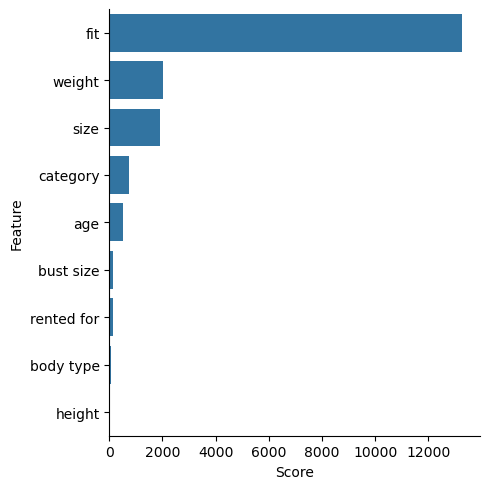

In [10]:
target=df['rating']
label_encoded_data=df.drop(drop_columns,axis=1).apply(le.fit_transform)

X_train, X_test, y_train, y_test = train_test_split(label_encoded_data,target, test_size=0.1, random_state=16)

# Let us use chi2 test of independence
chi= SelectKBest(score_func=chi2,k='all')
chi.fit(X_train,y_train)
df_imp=pd.DataFrame()
df_imp['Score']=chi.scores_
df_imp['Feature']=label_encoded_data.columns
df_imp.sort_values(by='Score',inplace=True,ascending=False)
sns.catplot(kind='bar',data=df_imp,x='Score',y='Feature')

In [11]:
df=pd.DataFrame(dataset)
df

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192457,fit,66386,34dd,2252812,140lbs,10,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42,"May 18, 2016"
192458,fit,118398,32c,682043,100lbs,10,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29,"September 30, 2016"
192459,fit,47002,36a,683251,135lbs,6,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31,"March 4, 2016"
192460,fit,961120,36c,126335,165lbs,10,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31,"November 25, 2015"


In [12]:
df.isna().sum()

fit                   0
user_id               0
bust size         18397
item_id               0
weight            29957
rating                0
rented for           10
review_text           0
body type         14637
review_summary        0
category              0
height              677
size                  0
age                 959
review_date           0
dtype: int64

From the above we have bust size, weight, body type, height and age columns that contain missing values

In [13]:
def get_bmi(h,w):
    height_list= list(map(int,re.findall(r'\d+',h)))
    if(all(height_list)==0):
        return 0.0
    height_inches=sum([height_list[i]*12 if i==0 else height_list[i] for i in range(len(height_list))])
    weight_lb=int(re.findall(r'\d+',w)[0])
    bmi= 703 * weight_lb/(height_inches)**2
    return bmi

In [14]:
#Adjust column dtypes to numeric to look at the distribution
df['age']=df['age'].fillna('0')
df['age']=df['age'].astype(int)
#df['rating']=df['rating'].fillna('0')
df['rating']=df['rating'].astype(int)
df['weight']=df['weight'].fillna('0lbs')
df['height']=df['height'].fillna('0\' 0"')
df['weight_integer']=df['weight'].apply(lambda x: int(''.join(re.findall(r'\d+',x)) ))

In [15]:
# Polarity score of >0.5 means the review is positive
df['review_polarity_score']=df['review_text'].apply(lambda x : sid.polarity_scores(x)['compound'])

In [16]:
df['BMI']=df.apply(lambda x : get_bmi(x.height,x.weight),axis=1)

<Axes: xlabel='review_polarity_score', ylabel='Density'>

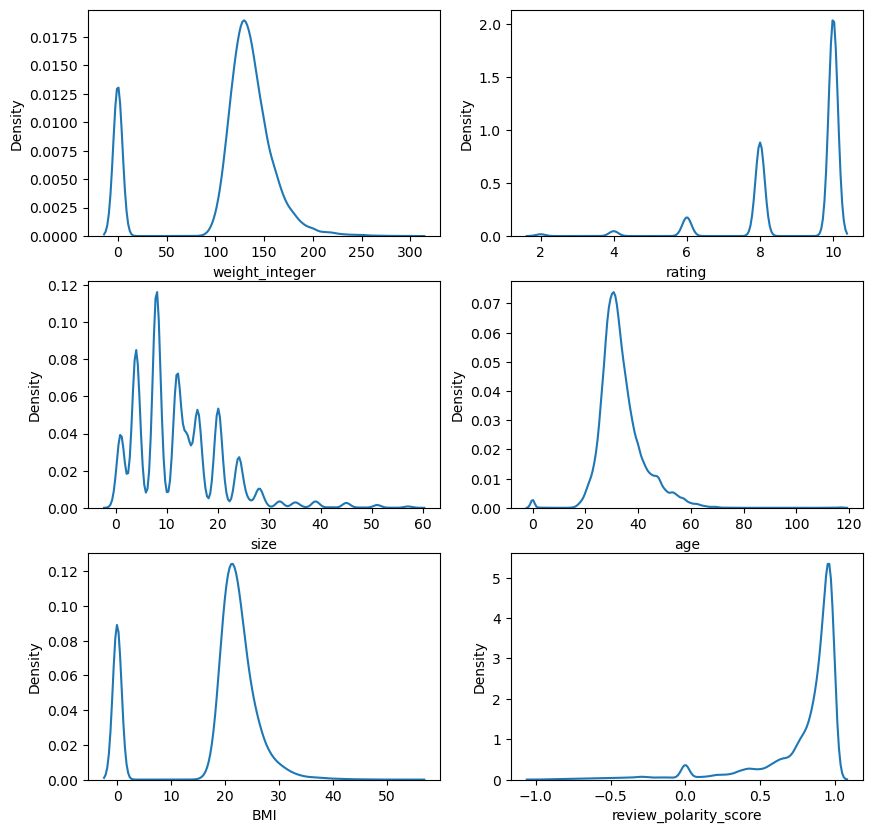

In [17]:
fig,ax=plt.subplots(3,2,figsize=(10,10)) #figsize(width,height)
sns.kdeplot(data=df,x='weight_integer',ax=ax[0,0])
sns.kdeplot(data=df,x='rating',ax=ax[0,1])
sns.kdeplot(data=df,x='size',ax=ax[1,0])
sns.kdeplot(data=df,x='age',ax=ax[1,1])
sns.kdeplot(data=df,x='BMI',ax=ax[2,0])
sns.kdeplot(data=df,x='review_polarity_score',ax=ax[2,1])

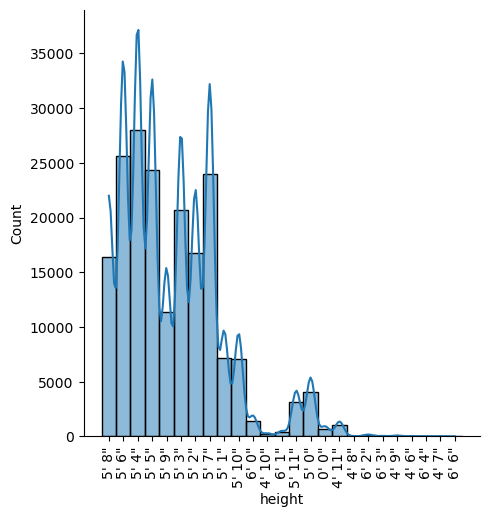

In [18]:
g=sns.displot(data=df,x='height',kde=True)
g.set_xticklabels(rotation=90,labels=df.height.unique().tolist())

In [19]:
df.groupby('rating')['review_polarity_score'].value_counts()

rating  review_polarity_score
2        0.0000                  135
         0.3612                   16
        -0.2755                   14
        -0.2960                    8
         0.3818                    7
                                ... 
10      -0.2747                    1
        -0.2741                    1
        -0.2731                    1
         0.3419                    1
         0.9994                    1
Name: count, Length: 21034, dtype: int64

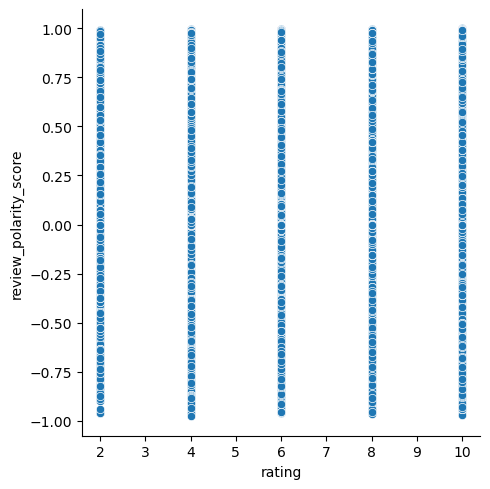

In [20]:
sns.relplot(data=df,kind='scatter',y='review_polarity_score',x='rating')

Looks like polarity score is scattered among all the ratings but the no. of observations for a high rating to have less polarity score is meager. So it can be used for further analysis

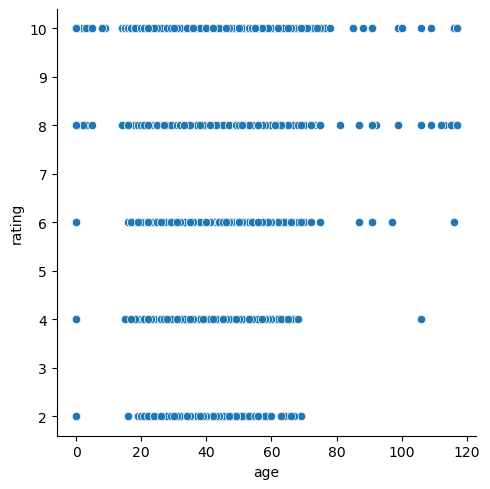

In [21]:
sns.relplot(data=df,kind='scatter',y='rating',x='age')

The distribution of age across all ratings is mostly same indicating that ratings doesn't change with age. Hence age can be discarded further

<Axes: xlabel='count', ylabel='fit'>

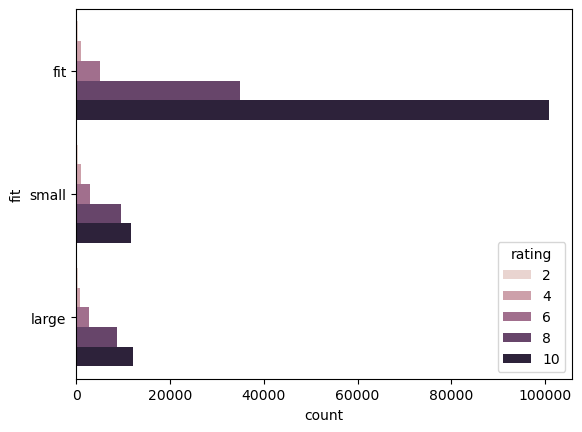

In [22]:
sns.countplot(data=df,y='fit',hue='rating')

The distribution of ratings among the 'fit' variable looks identical, ie.. whether the type of fit is either small or large or perfect the ratings are not particulary impacted. Hence we infer that fit wouldn't be of a big deal for rating prediction. But in practice fit is a significant part of ratings but there are many instances that determine the rating like quality, appearnce on rating. As a result fit can be discarded prior to durther evaluation

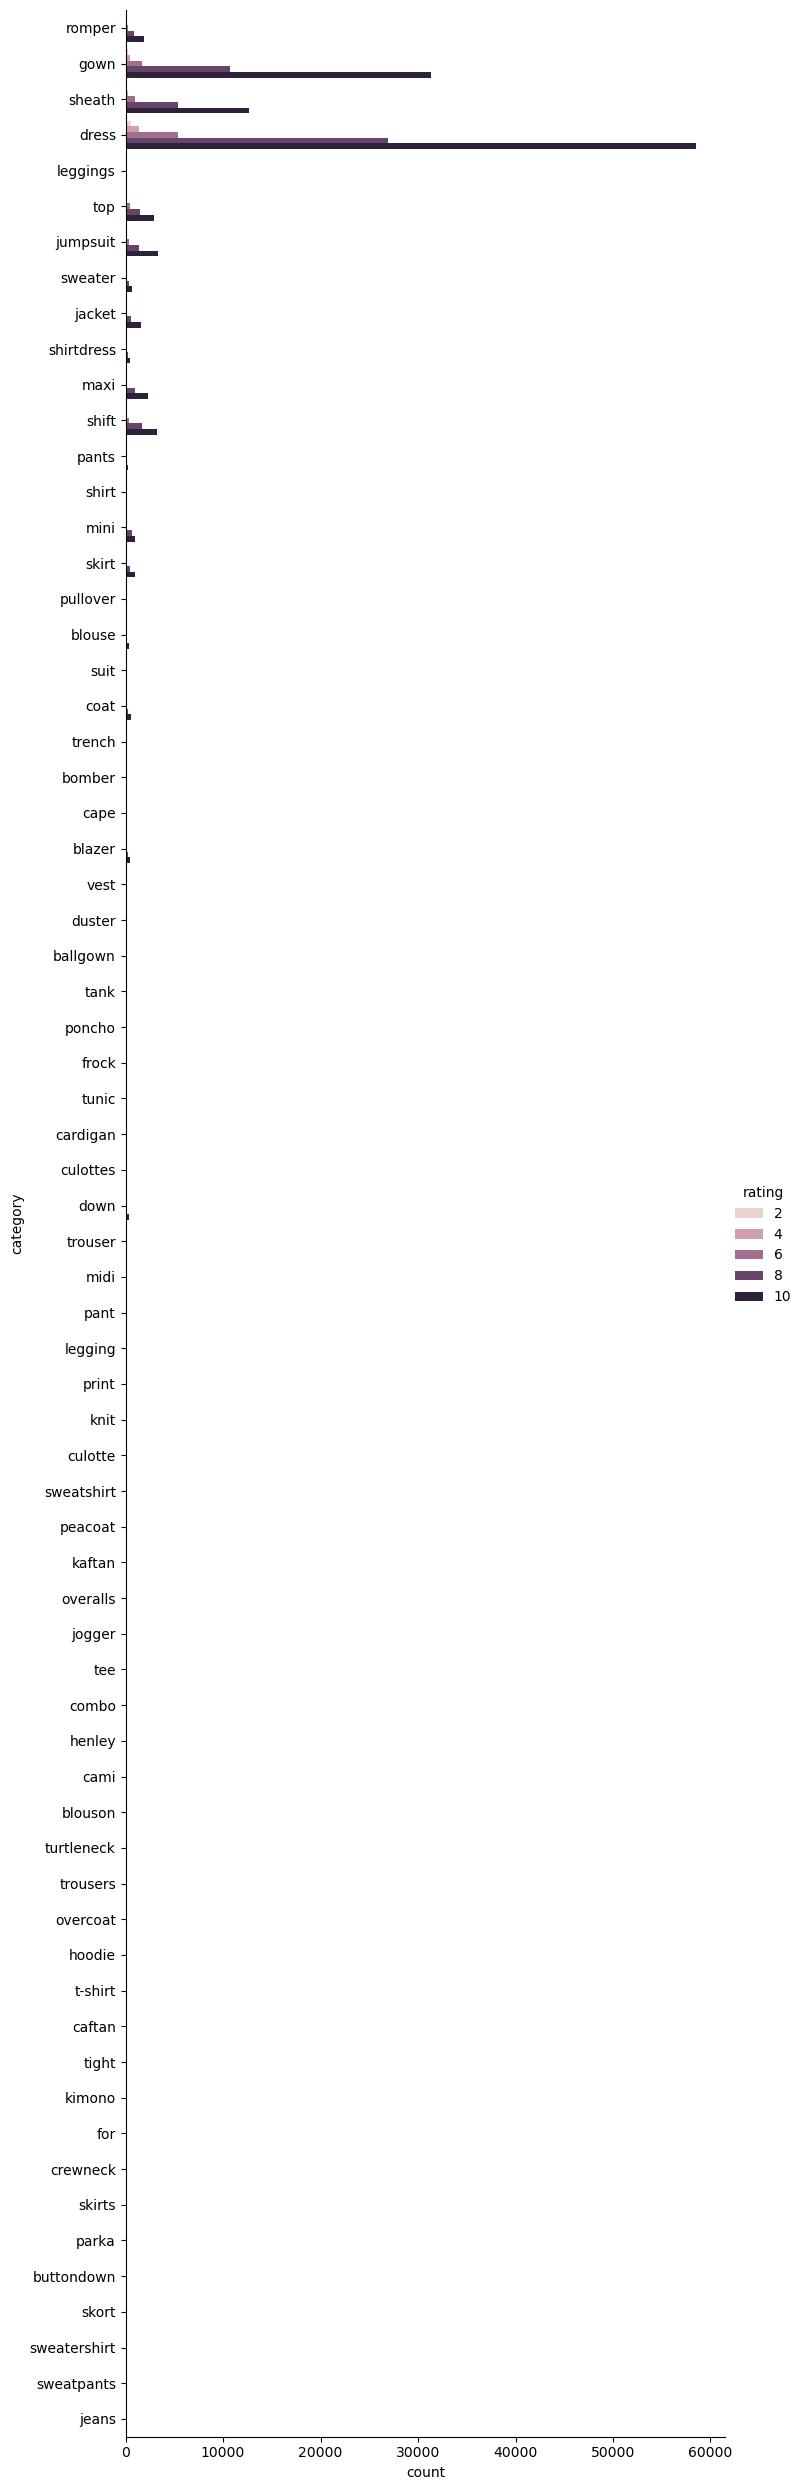

In [23]:
sns.catplot(data=df,y='category',kind='count',aspect=0.3,height=25,hue='rating')


Looks like majority of the categories are not rated by enough people but this can be considered while building a model as certain categories are used more, moreover the distribution of ratings acroos individual category remian same overall.

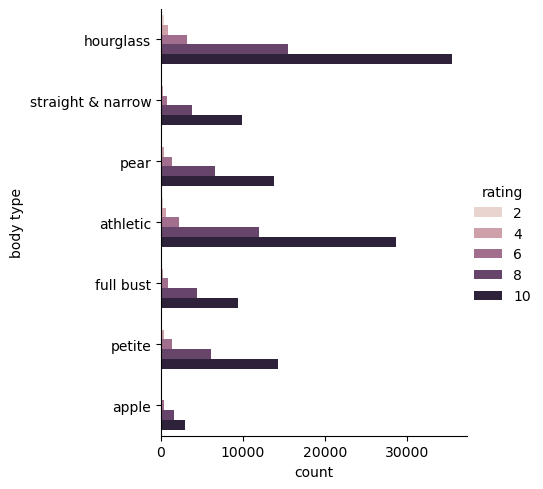

In [24]:
sns.catplot(data=df,y='body type',kind='count',aspect=1,hue='rating')

This can be included in final model, whether to include this in baseline is of personal preference

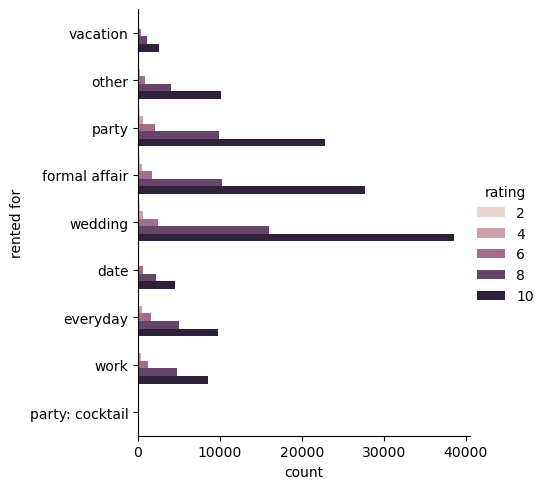

In [25]:
sns.catplot(data=df,y='rented for',kind='count',hue='rating')

In [26]:
df.groupby('rating')['bust size'].value_counts()

rating  bust size
2       34b          134
        34c          101
        34d           91
        36c           82
        36d           65
                    ... 
10      42j            1
        46c            1
        46f            1
        28i            1
        48dd           1
Name: count, Length: 370, dtype: int64

In [27]:
pd.pivot_table(columns='bust size',index='rating',aggfunc='count',data=df[['bust size','rating','BMI']],fill_value=0)

BMI                                            ...                   \
bust size 28a 28aa 28b 28c 28d 28dd 28ddd/e 28f 28g 28h  ... 44dd 44ddd/e 44f   
rating                                                   ...                    
2           1    1   0   0   0    1       0   1   0   0  ...    0       0   0   
4           0    0   0   1   0    3       0   1   0   0  ...    0       0   0   
6           3    0   3   2   0    1       1   0   0   1  ...    0       0   2   
8          13    3  12   8   3    6       5   3   2   0  ...    1       4   0   
10         43   13  58  45   4   20       6  15   5   0  ...   35       7   3   

                                            
bust size 44g 44h 46c 46ddd/e 46f 48d 48dd  
rating                                      
2           0   0   0       0   0   0    0  
4           0   0   0       0   0   0    0  
6           0   0   0       0   0   0    1  
8           0   0   3       1   0   0    1  
10          2   1   1       2   1   2    1  

[5 rows x 106 columns]

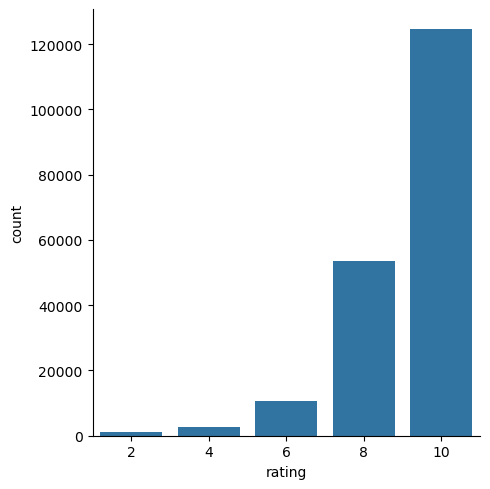

In [28]:
sns.catplot(data=df,x='rating',kind='count')

In [29]:
df['date_converted']=pd.to_datetime(df['review_date'],format='%B %d, %Y')

In [30]:
df['year']=df['date_converted'].dt.year
df['month']=df['date_converted'].dt.month

In [31]:
df['year']

0         2016
1         2013
2         2015
3         2014
4         2016
          ... 
192457    2016
192458    2016
192459    2016
192460    2015
192461    2017
Name: year, Length: 192462, dtype: int32

Text(0.5, 0, 'Year')

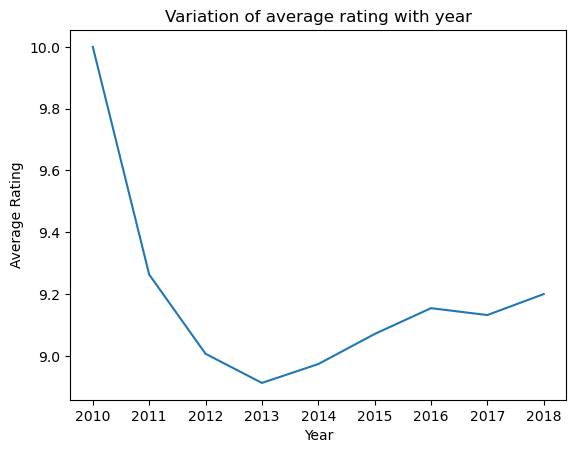

In [32]:
df.groupby('year')['rating'].mean().plot()
plt.title('Variation of average rating with year')
plt.ylabel('Average Rating')
plt.xlabel('Year')

Text(0.5, 0, 'Month')

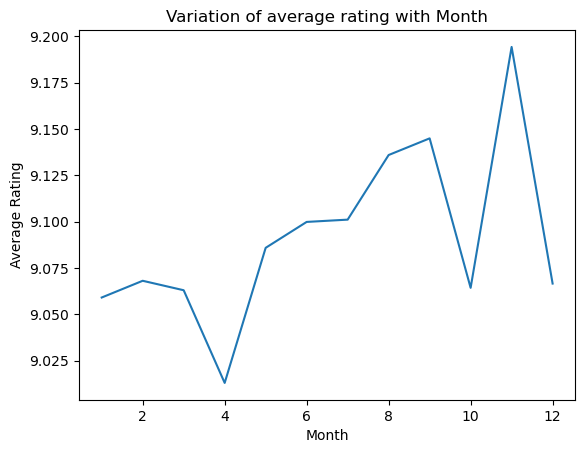

In [43]:
df.groupby('month')['rating'].mean().plot()
plt.title('Variation of average rating with Month')
plt.ylabel('Average Rating')
plt.xlabel('Month')

In [34]:
df['review_length']=df['review_text'].apply(lambda x: len(x))

<Axes: xlabel='rating'>

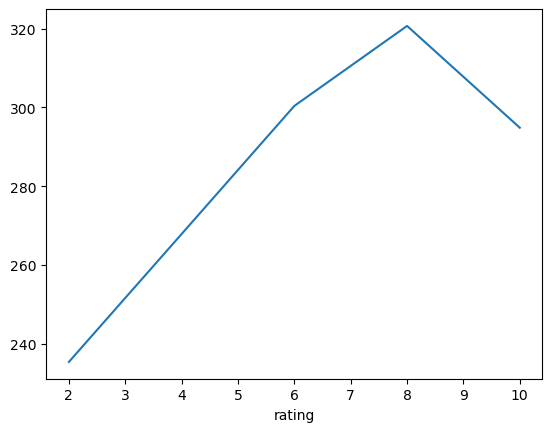

In [35]:
df.groupby('rating')['review_length'].mean().plot()

<Axes: xlabel='review_length'>

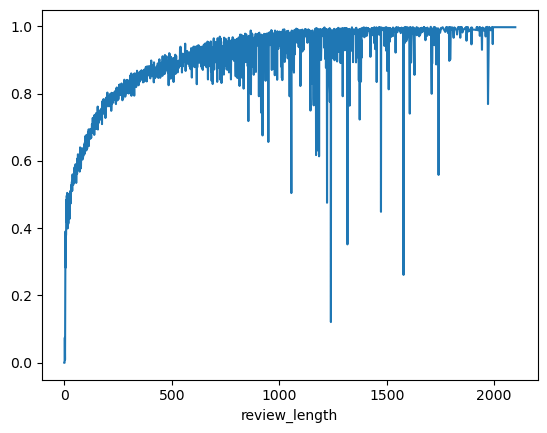

In [36]:
df.groupby('review_length')['review_polarity_score'].mean().plot()

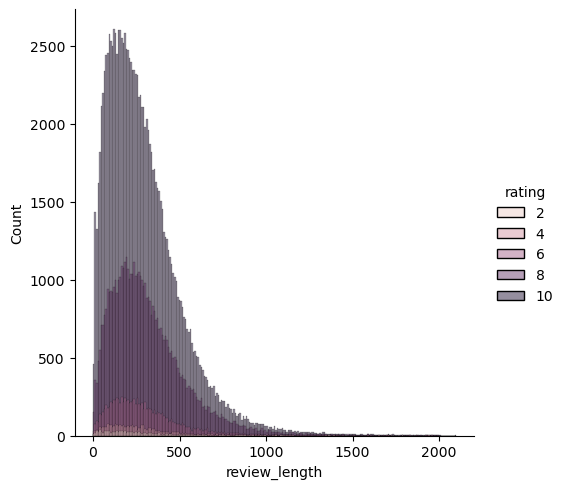

In [37]:
sns.displot(data=df,x='review_length',hue='rating')